In [25]:
import numpy as np
import matplotlib.pyplot as plt
from network_analysis import network_tools as nt
from network_analysis import circuit_design as cd
from importlib import reload

In [22]:
# Parameters
eps_r = 11.45               # relative permeability
c = 3e8                     # speed of light in vaccum
vp = c/np.sqrt((1+eps_r)/2) # speed of light in medium

# Network $S_{21}$ and voltage at nodes

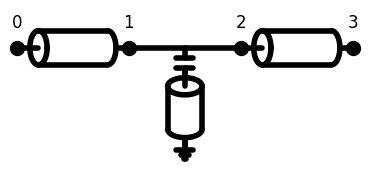

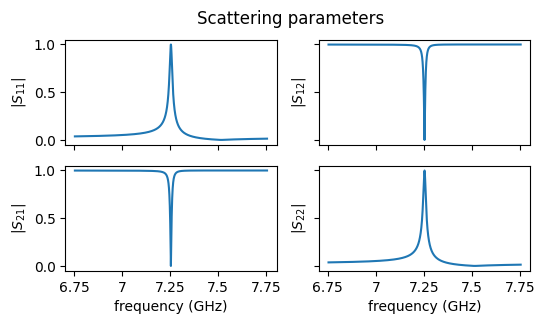

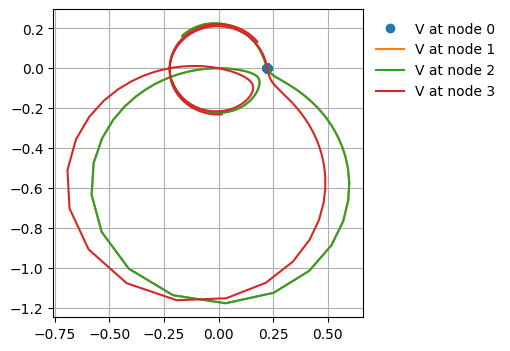

In [243]:
reload(nt)
reload(cd)
# Setup network
Z0 = 50
network = nt.Network(Zgen=Z0)
network.add_transmission_line(length=100e-3, Z0=Z0, phase_velocity=vp)
network.add_capacitively_coupled_hanger(4e-3, Z0, vp, Z_termination=0, C_coupling=8*3e-15)
network.add_transmission_line(length=100e-3, Z0=Z0, phase_velocity=vp)
network.draw_network()

frequency = 7.254e9#-1e6
frequency_axis = np.linspace(-500e6, 500e6, 10000) + frequency
S_pars = network.get_S_parameters(frequency_axis, plot=True)

fig, ax = plt.subplots(figsize=(4,4))
in_amp = nt.Vp_from_PdBm(0)
v_node_0, i_node_0 = network.get_node_VI(node_idx=0, in_freq=frequency_axis, in_phase=0, in_amp=in_amp)
v_node_1, i_node_1 = network.get_node_VI(node_idx=1, in_freq=frequency_axis, in_phase=0, in_amp=in_amp)
v_node_2, i_node_2 = network.get_node_VI(node_idx=2, in_freq=frequency_axis, in_phase=0, in_amp=in_amp)
v_node_3, i_node_3 = network.get_node_VI(node_idx=3, in_freq=frequency_axis, in_phase=0, in_amp=in_amp)
ax.plot(np.real(v_node_0), np.imag(v_node_0), 'C0o', label='V at node 0')
ax.plot(np.real(v_node_1), np.imag(v_node_1), 'C1-', label='V at node 1')
ax.plot(np.real(v_node_2), np.imag(v_node_2), 'C2-', label='V at node 2')
ax.plot(np.real(v_node_3), np.imag(v_node_3), 'C3-', label='V at node 3')
ax.legend(frameon=False, loc=2, bbox_to_anchor=(1,1))
ax.grid()
# ax.set_xlim(-1, 1)
# ax.set_ylim(-1, 1)

# Adding thermal noise from attenuators and amplifiers

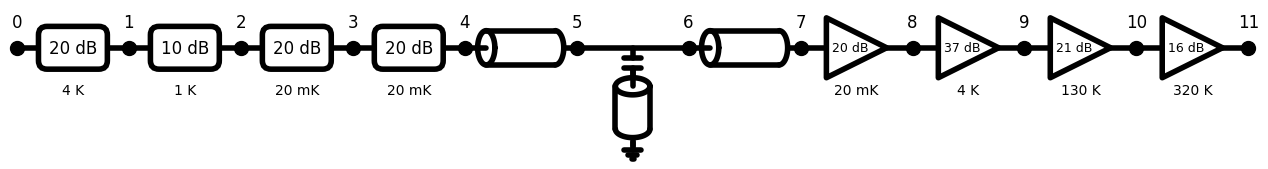

input power: 10 nW (Vpk: 707 μV)
power at 4: 1 fW (Vpk: 224 nV)


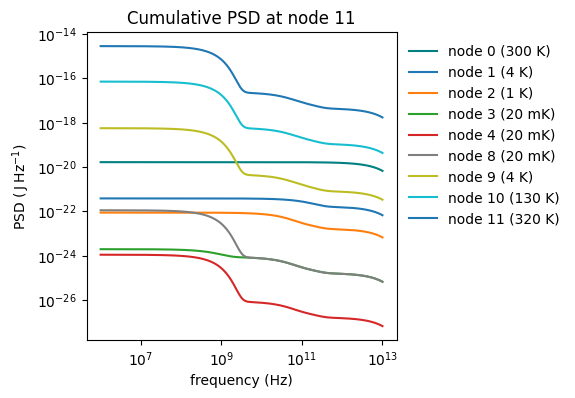

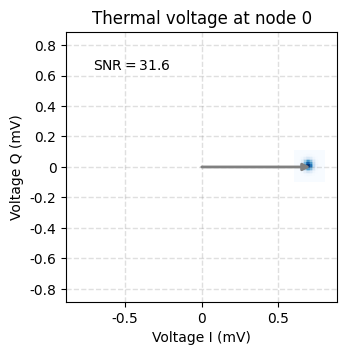

In [244]:
reload(nt)
reload(cd)
# Setup network
Z0 = 50
network = nt.Network(Zgen=Z0)
# input attenuation
# network.add_attenuator(attn_dB=10, temperature_K=300, Z0=Z0)   # 300K
network.add_attenuator(attn_dB=20, temperature_K=4, Z0=Z0)     # 4K 
network.add_attenuator(attn_dB=10, temperature_K=1, Z0=Z0)     # still
network.add_attenuator(attn_dB=20, temperature_K=20e-3, Z0=Z0) # MXC
network.add_attenuator(attn_dB=20, temperature_K=20e-3, Z0=Z0) # MXC
# resonator network
network.add_transmission_line(length=100e-3, Z0=Z0, phase_velocity=vp)
network.add_capacitively_coupled_hanger(4e-3, Z0, vp, Z_termination=0, C_coupling=3e-15)
network.add_transmission_line(length=100e-3, Z0=Z0, phase_velocity=vp)
# output gain
network.add_amplifier(gain_dB=20, temperature_K=20e-3, Z0=Z0) # MXC
network.add_amplifier(gain_dB=37, temperature_K=3.6, Z0=Z0)   # 4 K
network.add_amplifier(gain_dB=21, temperature_K=130, Z0=Z0)   # RT pre-amp (Xmicrowave) (noise-figure 1.4-1.8 dB)
network.add_amplifier(gain_dB=16, temperature_K=320, Z0=Z0)   # RT post-amp
network.draw_network()
plt.show()

# Plot PSD
PSD = network.get_psd_at_node(node_idx=11, frequency=np.logspace(6, 13, 1001), plot=True)

frequency = 7.481312e9-1e6
in_amp = nt.Vp_from_PdBm(-50)
in_power_mW = np.abs(np.prod(network.get_node_VI(node_idx=0, in_freq=frequency, in_phase=0, in_amp=in_amp)))
out_power_mW = np.abs(np.prod(network.get_node_VI(node_idx=4, in_freq=frequency, in_phase=0, in_amp=in_amp)))
out_amp = np.abs(network.get_node_VI(node_idx=4, in_freq=frequency, in_phase=0, in_amp=in_amp)[0][0])
print(f'input power: {nt.quantity_to_string(in_power_mW, "W")} (Vpk: {nt.quantity_to_string(in_amp, "V")})')
print(f'power at 4: {nt.quantity_to_string(out_power_mW, "W")} (Vpk: {nt.quantity_to_string(out_amp, "V")})')

network.get_node_thermal_VI(node_idx=0, in_freq=frequency, in_phase=0, in_amp=in_amp, shots=1e5)

# Inspect thermal SNR at each mode

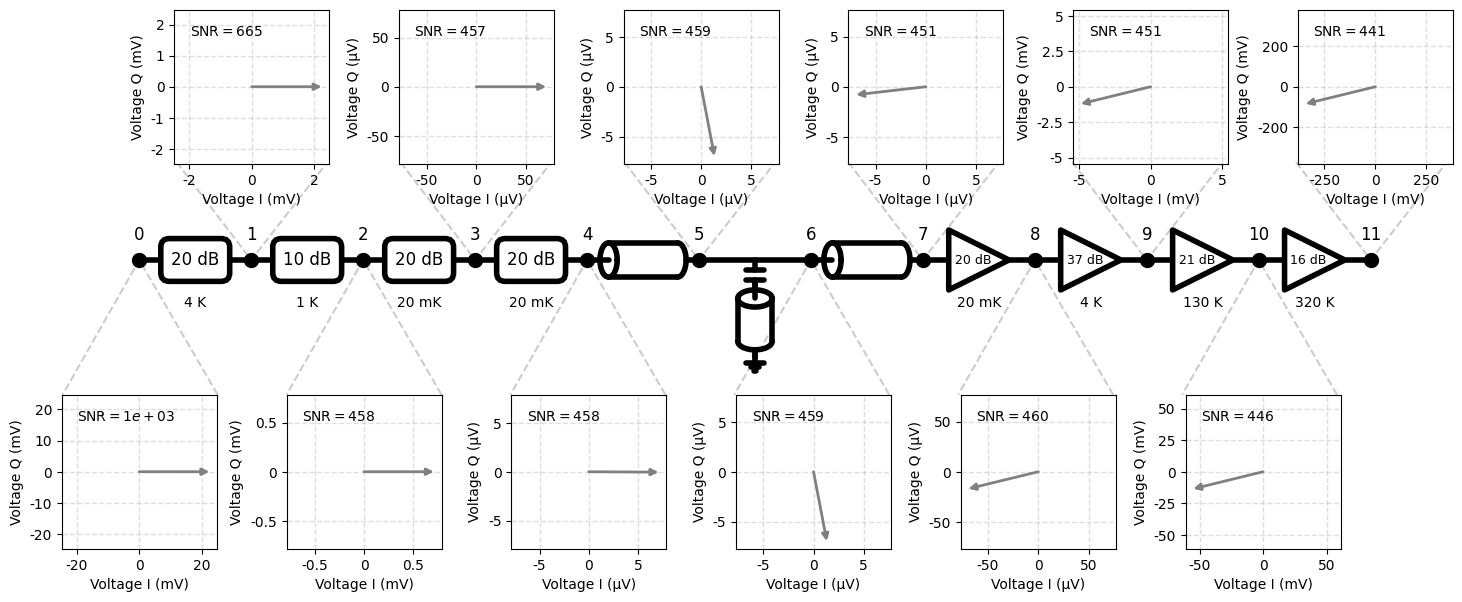

In [245]:
network.draw_network()
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    in_amp = nt.Vp_from_PdBm(-20)
    network.get_node_thermal_VI(node_idx=i, in_freq=frequency, in_phase=0, in_amp=in_amp, shots=1e5, on_figure=True)

# Quantum noise

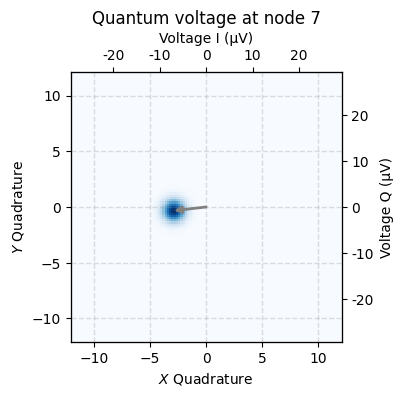

In [246]:
network.get_node_quantum_VI(node_idx=7, in_freq=frequency, in_phase=0, in_amp=in_amp)
# network.get_node_thermal_VI(node_idx=1, in_freq=frequency, in_phase=0, in_amp=in_amp, add_quantum_noise=True)

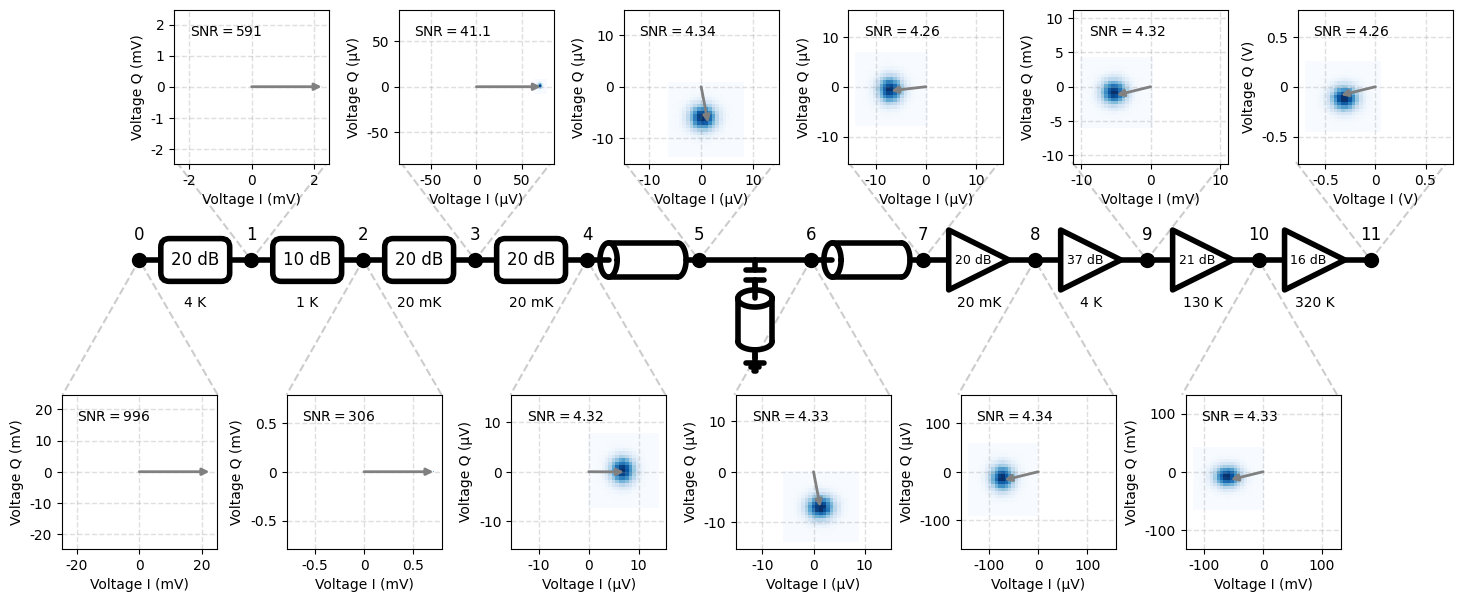

In [247]:
network.draw_network()
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    in_amp = nt.Vp_from_PdBm(-20)
    network.get_node_thermal_VI(node_idx=i, in_freq=frequency, in_phase=0, in_amp=in_amp, shots=1e5, on_figure=True, add_quantum_noise=True)